In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class RedNeuronal(object):
    def __init__(self):
        self.inputs = 2
        self.outputs = 1
        self.hidden = 15
        self.W1 = np.random.randn(self.inputs, self.hidden)
        self.W2 = np.random.randn(self.hidden, self.outputs)
    
    def sigmoide(self, z):
        return 1/(1 + np.exp(-z))
    
    def sigmoideDerivada(self, z):
        return np.exp(-z) / ((1 + np.exp(-z))**2)

    def feedForward(self, X):
        self.z2 = X @ self.W1
        self.a2 = self.sigmoide(self.z2)
        self.z3 = self.a2 @ self.W2
        self.yhat = self.sigmoide(self.z3)
        return self.yhat
    
    def costFunction(self, X, y):
        self.yhat = self.feedForward(X)
        cost = 0.5 * sum((y - self.yhat)**2)
        return cost
    
    def costFunctionDeriv(self, X, y):
        # Predicciones
        self.yhat = self.feedForward(X)
        # delta3 = diferencia de y - yhat * derivadaFuncionActivacion
        self.delta3 = np.multiply(-(y - self.yhat), self.sigmoideDerivada(self.z3))
        # djW2 = producto transpuesta a2 * delta3
        self.djW2 = np.dot(self.a2.T, self.delta3) # self.a2.T @ self.delta3
        # delta2 = delta3 dot transpuesta W2 * sigmoideDerivada z2
        self.delta2 = self.delta3 @ self.W2.T * self.sigmoideDerivada(self.z2)
        # djDW1 = delta2 dot transpuesta de X
        self.djW1 = X.T @ self.delta2
        return self.djW1, self.djW2
    
    def getPesos(self):
        data = np.concatenate((self.W1.ravel(), self.W2.ravel()))
        return data
   
    def setPesos(self, datos):
        W1_inicio = 0
        W1_fin = self.hidden * self.inputs
        self.W1 = np.reshape(datos[W1_inicio:W1_fin], (self.inputs , self.hidden))
        W2_fin = W1_fin + self.hidden*self.outputs
        self.W2 = np.reshape(datos[W1_fin:W2_fin], (self.hidden, self.outputs))

    def getGradientes(self, X, y):
        djW1, djW2 = self.costFunctionDeriv(X, y)
        return np.concatenate((djW1.ravel(), djW2.ravel()))

In [3]:
from scipy import optimize
class Entrenador:
    def __init__(self, unaRed):
        #referencia a una red local
        self.NN = unaRed
       
    def actualizaPesos(self, params):
        self.NN.setPesos(params)
        self.Costos.append(self.NN.costFunction(self.X, self.y))
        self.CostosTest.append(self.NN.costFunction(self.Xtest, self.ytest))
       
    def obtenPesosNN(self, params, X, y):
        self.NN.setPesos(params)
        cost = self.NN.costFunction(X, y)
        grad = self.NN.getGradientes(X,y)        
        return cost, grad
       
    def entrena(self, X, y, Xtest, ytest):
        # X = Xtrain, y = ytrain
        # variables para funciones callback
        self.X = X
        self.y = y
        
        self.Xtest = Xtest
        self.ytest = ytest
       
        # lista temporal de costos
        self.Costos = []
        self.CostosTest = []
        
        pesos = self.NN.getPesos()
 
        opciones = {'maxiter': 200, 'disp' : True}
       
        salida = optimize.minimize(self.obtenPesosNN, pesos, jac=True, method='BFGS', \
                                 args=(X, y), options=opciones, callback=self.actualizaPesos)
 
        self.NN.setPesos(salida.x)
        self.resultados = salida

In [4]:
phones = pd.read_csv("Amazon_Unlocked_Mobile_Filtered_Final.csv", usecols=['Brand Name', 'Price', 'Rating'] )
phones

,Brand Name,Price,Rating
0,Samsung,199.99,5
1,Samsung,199.99,5
2,Samsung,199.99,1
3,Nokia,299.00,4
4,Nokia,299.00,5
5,Nokia,299.00,5
6,Nokia,299.00,1
7,Nokia,299.00,5
8,Nokia,299.00,2
9,Nokia,299.00,5


In [5]:
brands = pd.read_csv("Amazon_Unlocked_Mobile_Filtered_Final.csv", usecols=['Brand Name'])
brands

,Brand Name
0,Samsung
1,Samsung
2,Samsung
3,Nokia
4,Nokia
5,Nokia
6,Nokia
7,Nokia
8,Nokia
9,Nokia


In [6]:
brandDictionary = {}


temp = brands.values
brandArray = temp.ravel()


In [7]:
counter = 100;
for brand in brandArray:
    if(brandDictionary.get(str(brand)) == None):
        brandDictionary[str(brand)]=counter
        counter = counter + 10
        
      


In [8]:
print(brandDictionary)

{'Samsung': 100, 'Nokia': 110, 'Acer': 120, 'Amazon': 130, 'Asus': 140, 'LG': 150, 'Motorola': 160, 'BlackBerry': 170, 'Huawei': 180, 'HTC': 190, 'Lenovo': 200, 'lg': 210}


In [9]:
def parseBrand(brand):
    return brandDictionary.get(str(brand))

In [10]:
phonesArray = phones.values


for phone in phonesArray:
    phone[0] = parseBrand(phone[0])
    

In [11]:
print(phonesArray)

[[100 199.99 5]
 [100 199.99 5]
 [100 199.99 1]
 ...
 [100 79.95 2]
 [100 79.95 3]
 [100 79.95 1]]


In [12]:
#train inputs 
Xtrain = np.array( (phonesArray[:math.floor(phonesArray.shape[0] * .8) , :2 ])).astype(float)

#train Output
Ytrain = np.array( (phonesArray[:math.floor(phonesArray.shape[0] * .8), 2:])).astype(float)


#normalized train X and Y
Xntrain = Xtrain / Xtrain.max()
Yntrain = Ytrain / Ytrain.max()



#test inputs
Xtest = np.array((phonesArray[math.floor(phonesArray.shape[0] * .8): ,:2])).astype(float)
#test outputs
Ytest = np.array((phonesArray[math.floor(phonesArray.shape[0] * .8):, 2:])).astype(float)

Xntest = Xtest / Xtest.max()
Yntest = Ytest / Ytest.max()





         Current function value: 35.443533
         Iterations: 200
         Function evaluations: 233
         Gradient evaluations: 233


Text(0.5,0,'iteración')

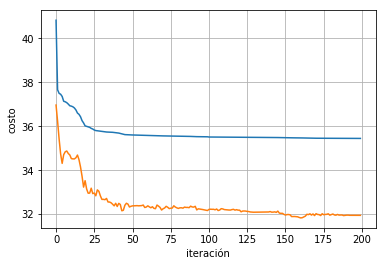

In [41]:
rn = RedNeuronal()
e = Entrenador(rn)
e.entrena(Xntrain, Yntrain, Xntest, Yntest)

plt.plot(e.Costos)
plt.plot(e.CostosTest)
plt.grid(1)
plt.ylabel("costo")
plt.xlabel("iteración")